In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("creditcard.csv")

In [12]:
df_info = df.info()
df_head = df.head()

# Check for missing values and duplicates
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

df_info, df_head, missing_values, duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

In [14]:
df_cleaned = df.drop_duplicates()

original_shape = df.shape
new_shape = df_cleaned.shape

original_shape, new_shape

((284807, 31), (283726, 31))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

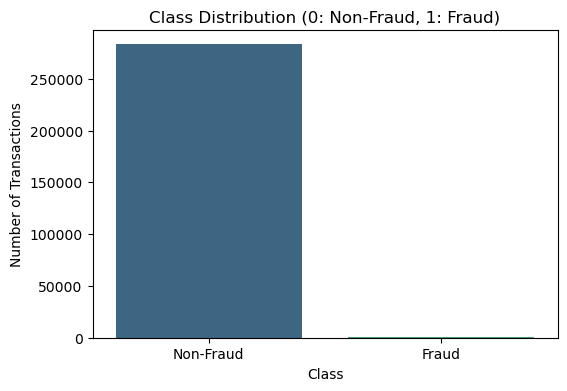

Class
0    283253
1       473
Name: count, dtype: int64

In [18]:
class_counts = df_cleaned['Class'].value_counts()

# Plotting class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# Summary of class counts
class_counts

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


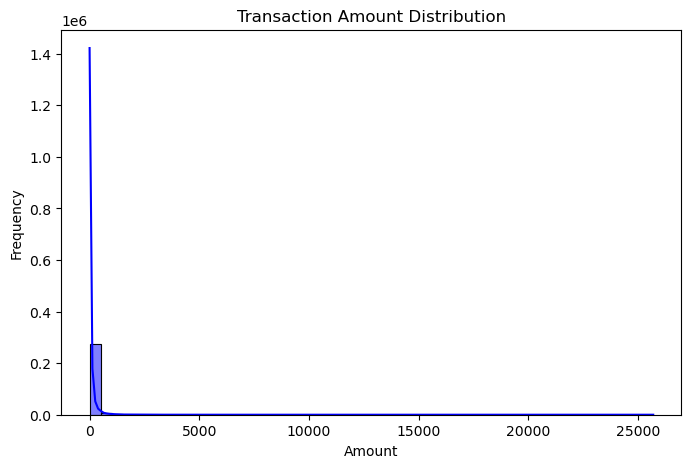

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


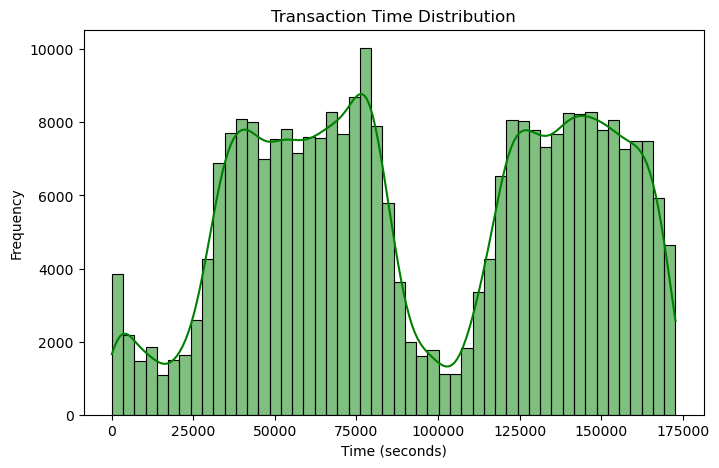

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Time'], bins=50, kde=True, color='green')
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

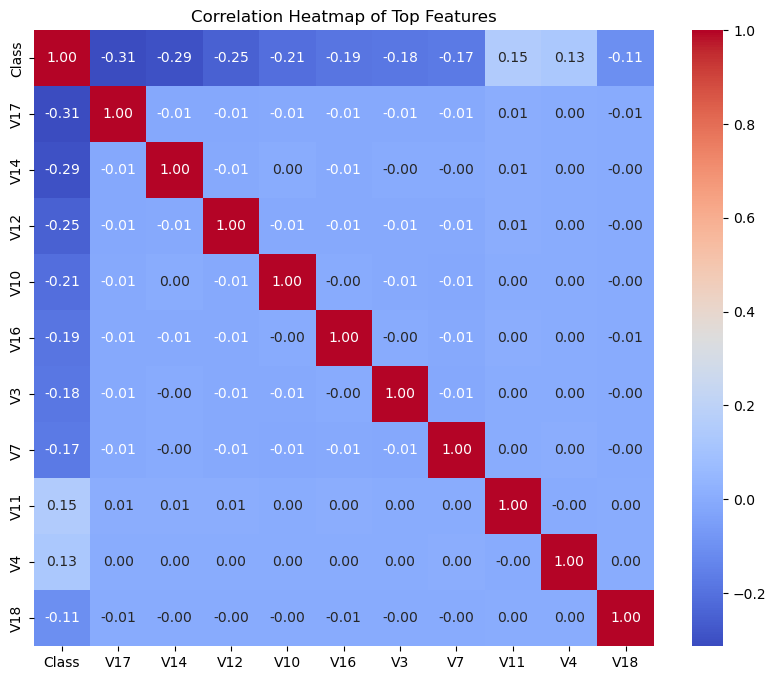

In [24]:
correlation_matrix = df_cleaned.corr()
top_correlated_features = correlation_matrix['Class'].abs().sort_values(ascending=False).index[:11]
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[top_correlated_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Top Features")
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

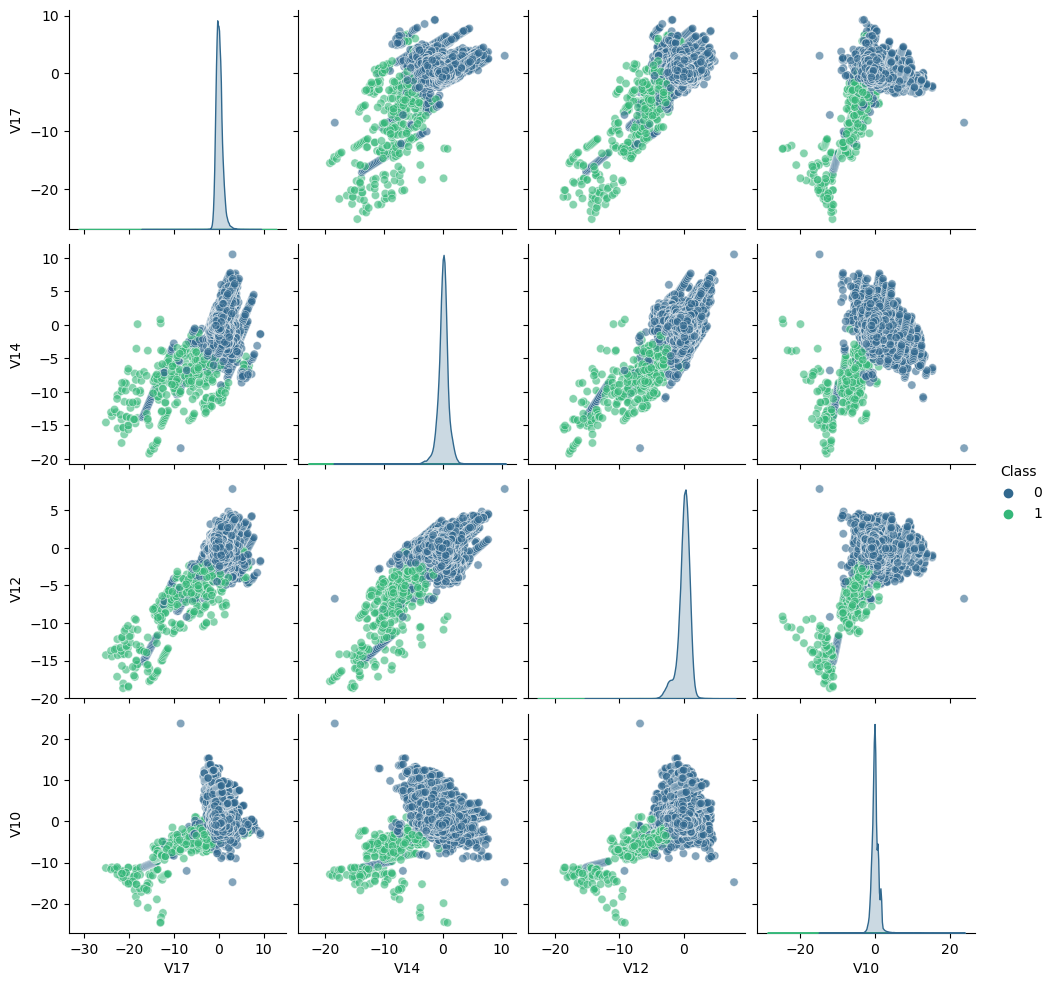

In [26]:
high_corr_features = top_correlated_features[1:5]  # Select a subset for better visualization
sns.pairplot(df_cleaned, vars=high_corr_features, hue="Class", diag_kind="kde", palette="viridis", plot_kws={'alpha': 0.6})
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((198608, 30), (85118, 30), (198608,), (85118,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [40]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

In [42]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
y_pred = logistic_model.predict(X_test)
y_proba = logistic_model.predict_proba(X_test)[:, 1]

In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118

Confusion Matrix:
 [[84961    15]
 [   61    81]]
ROC-AUC Score: 0.9652878791294178


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

In [52]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.78      0.86       142

    accuracy                           1.00     85118
   macro avg       0.98      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118

Confusion Matrix:
 [[84971     5]
 [   31   111]]
ROC-AUC Score: 0.9240786876692275


In [58]:
from xgboost import XGBClassifier

In [60]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


In [62]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [64]:

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [66]:
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.75      0.84       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Confusion Matrix:
 [[84972     4]
 [   36   106]]
ROC-AUC Score: 0.9759555556365875


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)

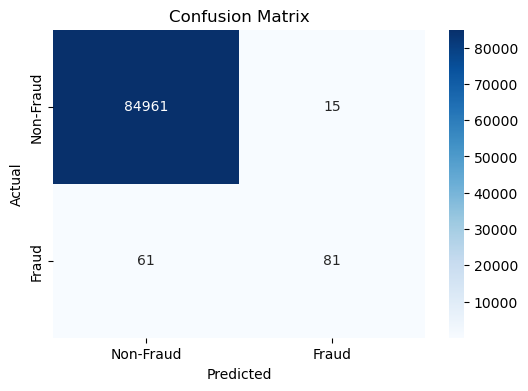

In [72]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()